### Problem Definition: Employee Attrition Prediction (The "HRM & Analytics" Hybrid)


### Description of Columns:
1. Age: Numeric feature representing the age of the employee in years.
2. Attrition (Target): Binary feature indicating whether the employee has 3.left the company (Yes = left, No = stayed).
3. BusinessTravel: Categorical feature indicating the frequency of business travel (Non-Travel, Travel_Rarely, Travel_Frequently).
4. DailyRate: Numeric feature representing the daily pay rate of the employee.
5. Department: Categorical feature representing the department the employee works in (Sales, Research & Development, Human Resources).
6. DistanceFromHome: Numeric feature representing the distance from the employee’s home to the office.
7. Education: Categorical feature representing the employee’s education level (1 = Below College, 5 = Doctor).
8. EducationField: Categorical feature representing the employee’s field of study (Life Sciences, Medical, Marketing, Technical, HR, Other).
9. EmployeeCount: Constant numeric feature (always 1, used for HR system purposes).
10. EmployeeNumber: Numeric feature representing a unique employee ID.
11. EnvironmentSatisfaction: Categorical/numeric feature representing the employee’s satisfaction with the work environment (1–4).
12. Gender: Categorical feature representing the gender of the employee (Male/Female).
13. HourlyRate: Numeric feature representing the hourly pay rate of the employee.
14. JobInvolvement: Categorical/numeric feature representing the employee’s involvement in their job (1–4).
15. JobLevel: Numeric feature representing the hierarchical level of the job (1 = entry, 5 = executive).
16. JobRole: Categorical feature representing the employee’s specific job title (e.g., Sales Executive, Manager, Research Scientist).
17. JobSatisfaction: Categorical/numeric feature representing the employee’s satisfaction with their job (1–4).
18. MaritalStatus: Categorical feature representing the marital status of the employee (Single, Married, Divorced).
19. MonthlyIncome: Numeric feature representing the monthly salary of the employee.
20. MonthlyRate: Numeric feature representing the monthly pay rate.
21. NumCompaniesWorked: Numeric feature representing the number of previous companies the employee has worked for.
22. Over18: Categorical feature indicating whether the employee is over 18 years old (always "Y").
23. OverTime: Categorical feature indicating whether the employee works overtime (Yes/No).
24. PercentSalaryHike: Numeric feature representing the last percent salary increase received.
25. PerformanceRating: Numeric feature representing the employee’s performance rating (1–4).
26. RelationshipSatisfaction: Categorical/numeric feature representing satisfaction with relationships at work (1–4).
27. StandardHours: Constant numeric feature representing standard weekly hours (usually 40).
28. StockOptionLevel: Numeric feature representing the level of stock options received (0–3).
29. TotalWorkingYears: Numeric feature representing the total years of professional experience.
30. TrainingTimesLastYear: Numeric feature representing the number of training sessions attended last year.
31. WorkLifeBalance: Categorical/numeric feature representing the employee’s work-life balance (1–4).
32. YearsAtCompany: Numeric feature representing total years the employee has worked at the company.
33. YearsInCurrentRole: Numeric feature representing the years spent in the current role.
34. YearsSinceLastPromotion: Numeric feature representing the number of years since the last promotion.
35. YearsWithCurrManager: Numeric feature representing years the employee has worked with the current manager.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC,LinearSVC
from tensorflow.keras.models import Sequential
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from tensorflow.keras.layers import Dense,Dropout, Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import mean_squared_error,accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report,roc_curve,auc
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


#### Data Loading and Exploration

In [2]:
df=pd.read_csv('HR-Emp-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1155,39,No,Travel_Rarely,170,Research & Development,3,2,Medical,1,1627,...,4,80,1,11,3,3,10,8,0,7
510,54,No,Travel_Rarely,397,Human Resources,19,4,Medical,1,698,...,3,80,1,16,1,4,9,7,7,1
908,33,No,Travel_Rarely,536,Sales,10,5,Marketing,1,1268,...,4,80,2,10,3,3,9,8,0,8
1412,30,No,Travel_Rarely,911,Research & Development,1,2,Medical,1,1989,...,3,80,0,12,6,2,12,8,1,7
764,28,No,Travel_Rarely,1144,Sales,10,1,Medical,1,1056,...,2,80,0,1,5,3,1,0,0,0


#### Missing Values

In [8]:
null_counts = df.isnull().sum()
print(null_counts)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

we see the is no missing values

# Exploratory Data Analysis (EDA)

In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


people have loans counts

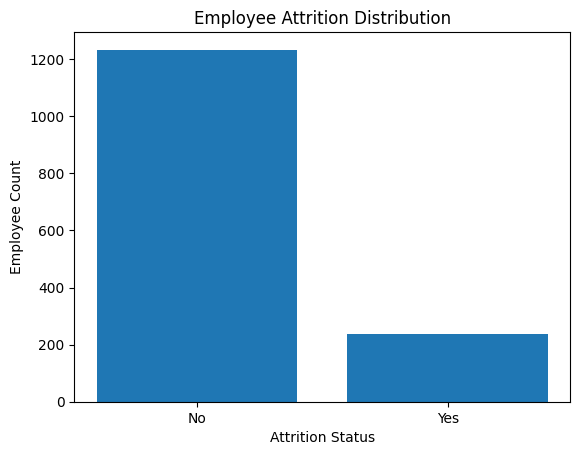

In [10]:
# count attrition values
counts = df["Attrition"].value_counts()

# bar plot
plt.bar(counts.index, counts.values)

# labels and title
plt.xlabel("Attrition Status")
plt.ylabel("Employee Count")
plt.title("Employee Attrition Distribution")

plt.show()

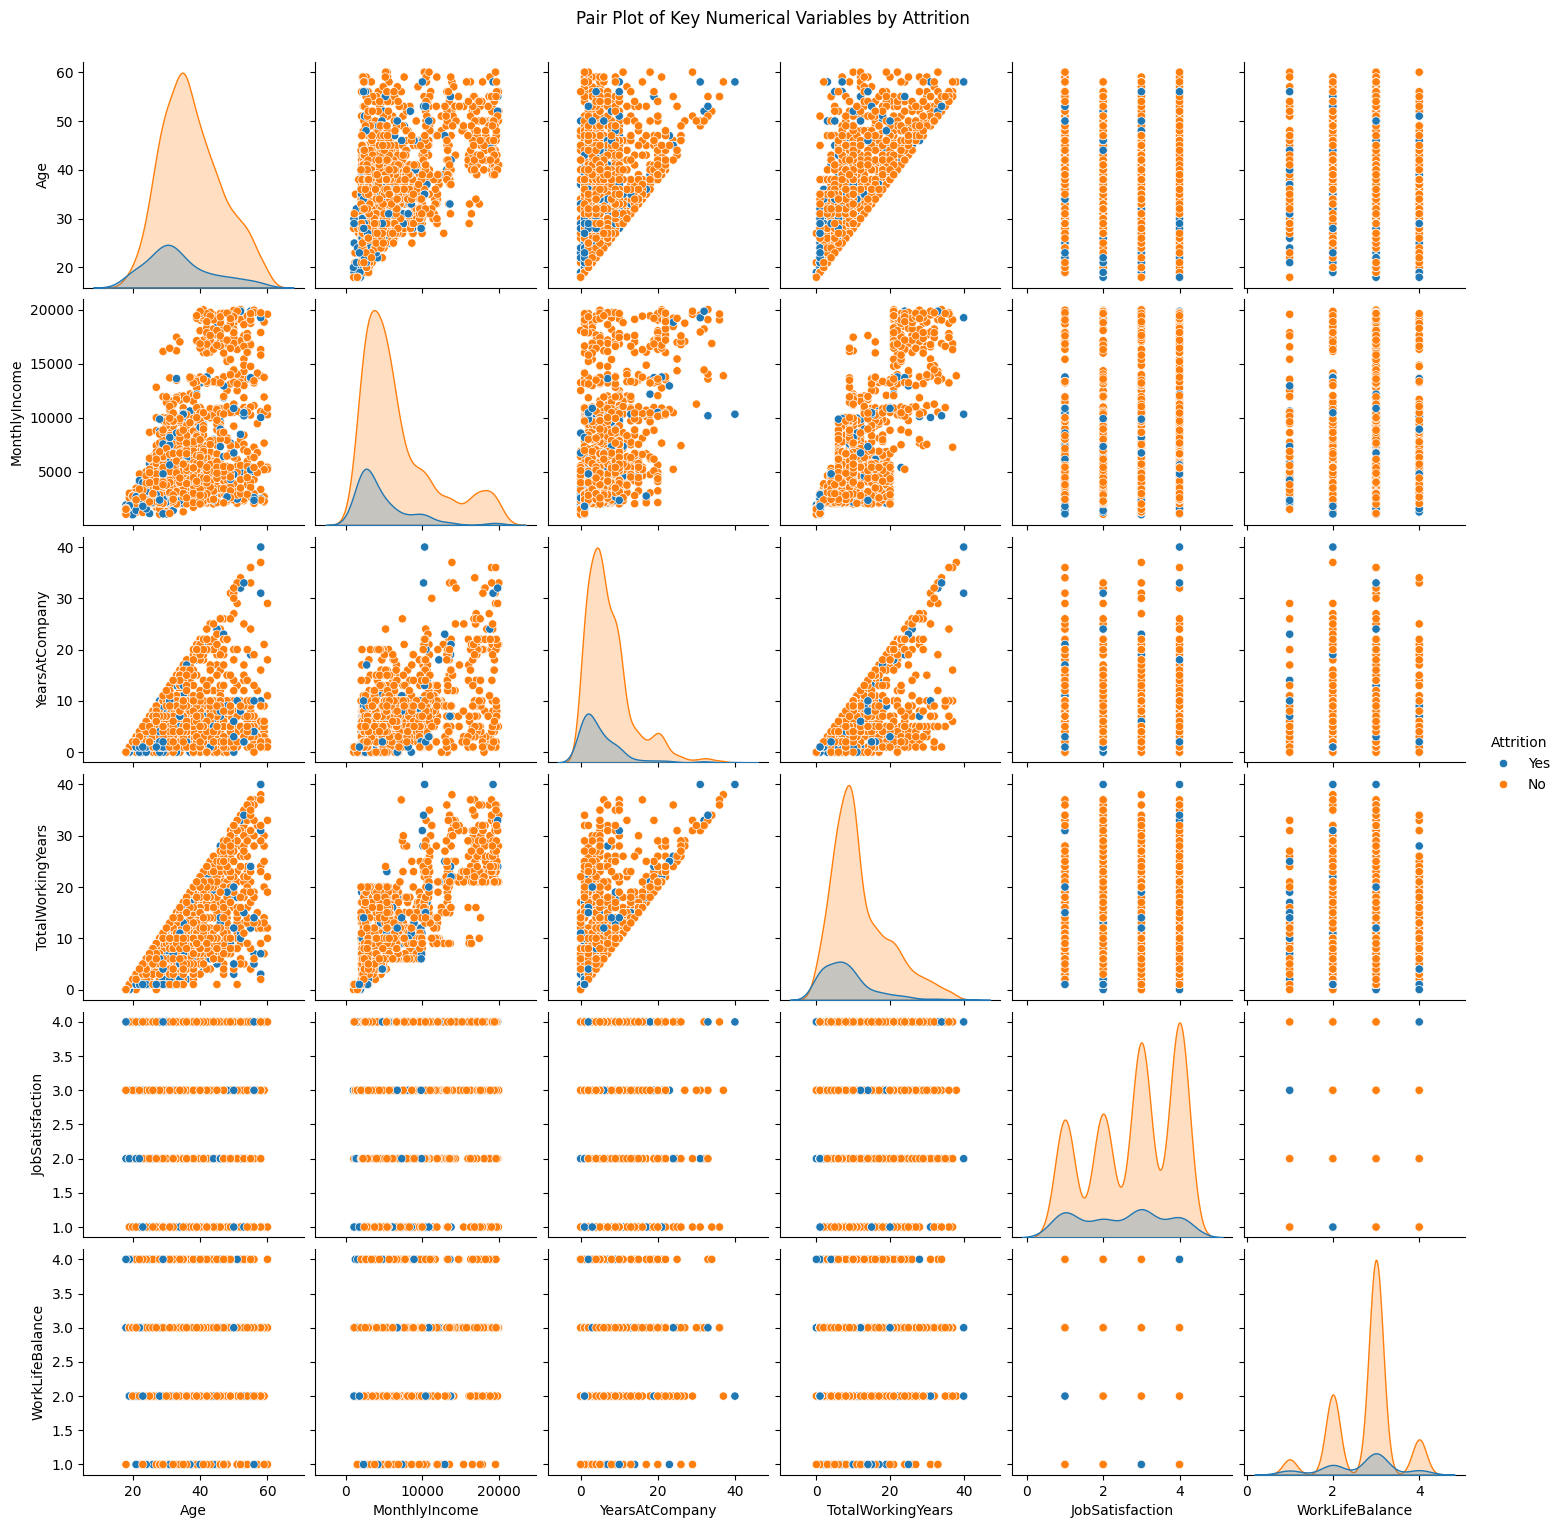

In [11]:
# select key numerical columns relevant to attrition
num_cols = [
    "Age",
    "MonthlyIncome",
    "YearsAtCompany",
    "TotalWorkingYears",
    "JobSatisfaction",
    "WorkLifeBalance"
]

# pair plot with attrition segmentation
sns.pairplot(
    df[num_cols + ["Attrition"]],
    hue="Attrition",
    diag_kind="kde"
)

plt.suptitle("Pair Plot of Key Numerical Variables by Attrition",
             y=1.02)

plt.show()

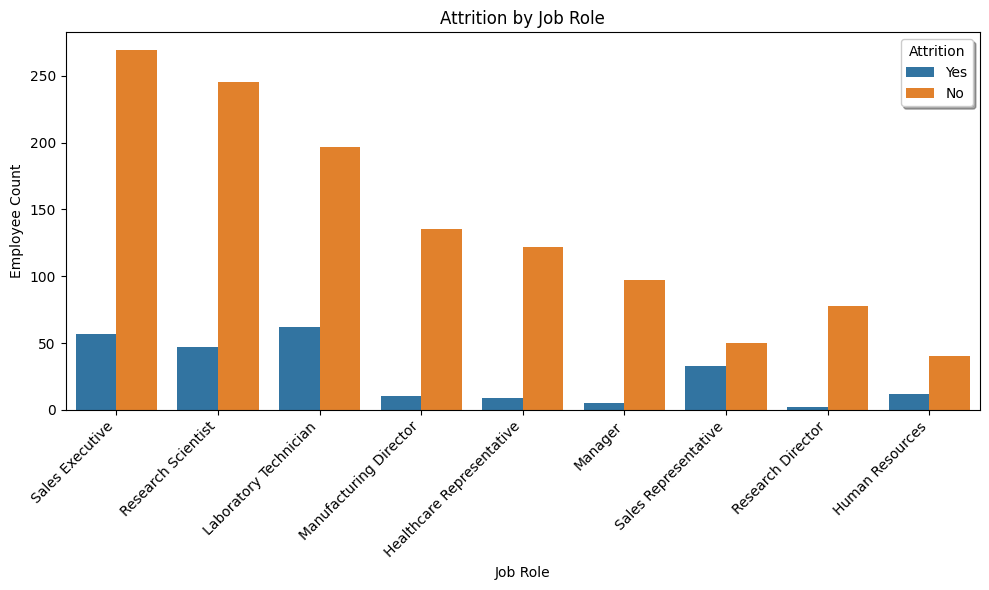

In [12]:

plt.figure(figsize=(10, 6))
plt.title('Attrition by Job Role')

g = sns.countplot(
    x='JobRole',
    hue='Attrition',
    data=df
)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Employee Count')
plt.xlabel('Job Role')

plt.legend(title='Attrition', fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

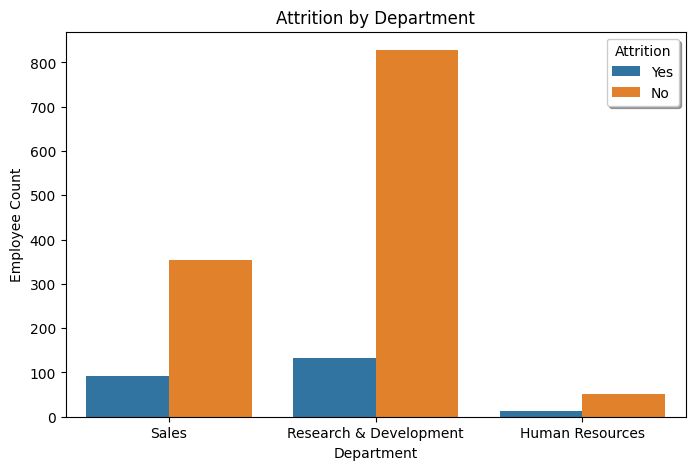

In [13]:
plt.figure(figsize=(8, 5))
plt.title('Attrition by Department')

sns.countplot(
    x='Department',
    hue='Attrition',
    data=df
)

plt.ylabel('Employee Count')
plt.xlabel('Department')

plt.legend(title='Attrition', fancybox=True, shadow=True)
plt.show()

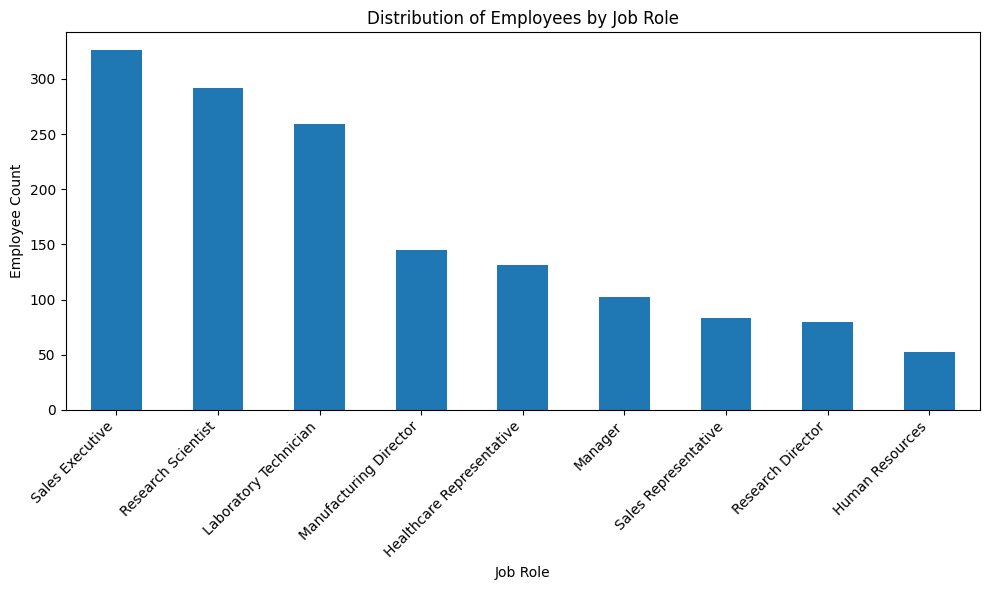

In [14]:
plt.figure(figsize=(10, 6))

jobrole_counts = df['JobRole'].value_counts()

jobrole_counts.plot(kind='bar')

plt.xlabel('Job Role')
plt.ylabel('Employee Count')
plt.title('Distribution of Employees by Job Role')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

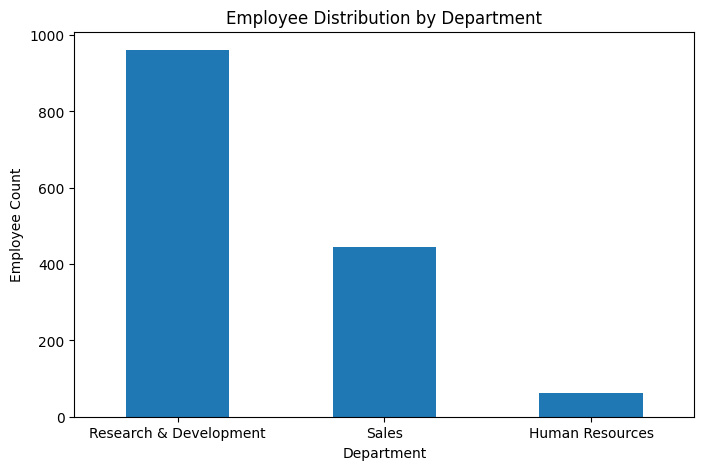

In [15]:
plt.figure(figsize=(8, 5))

dept_counts = df['Department'].value_counts()

dept_counts.plot(kind='bar')

plt.xlabel('Department')
plt.ylabel('Employee Count')
plt.title('Employee Distribution by Department')

plt.xticks(rotation=0)
plt.show()

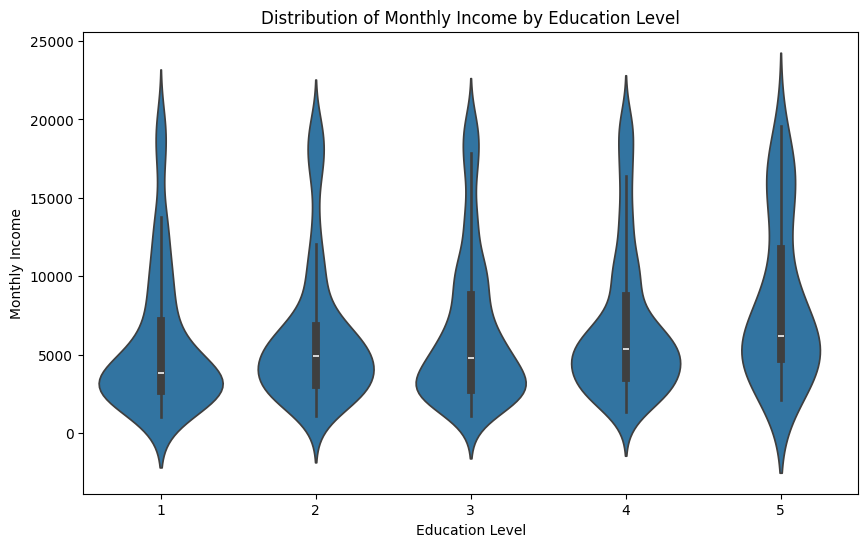

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.violinplot(
    data=df,
    x='Education',
    y='MonthlyIncome'
)

plt.xlabel('Education Level')
plt.ylabel('Monthly Income')
plt.title('Distribution of Monthly Income by Education Level')

plt.show()

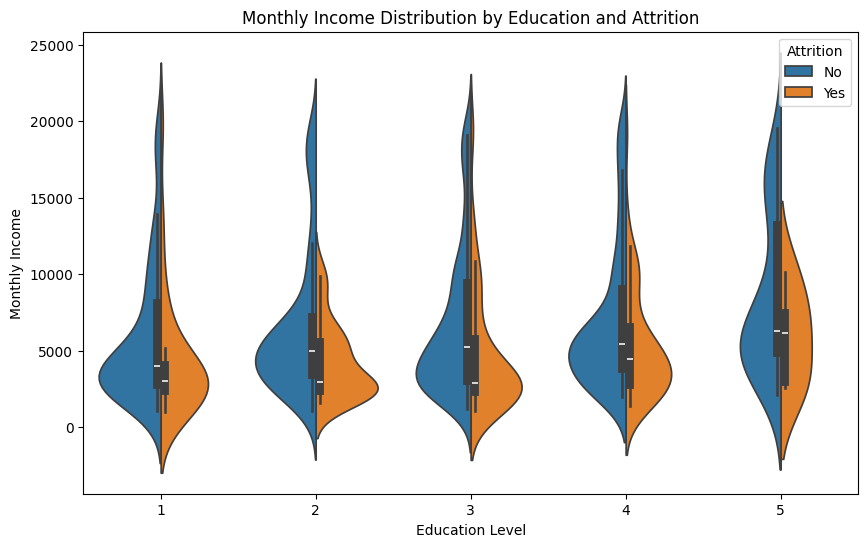

In [17]:
plt.figure(figsize=(10, 6))

sns.violinplot(
    data=df,
    x='Education',
    y='MonthlyIncome',
    hue='Attrition',
    split=True
)

plt.xlabel('Education Level')
plt.ylabel('Monthly Income')
plt.title('Monthly Income Distribution by Education and Attrition')

plt.show()

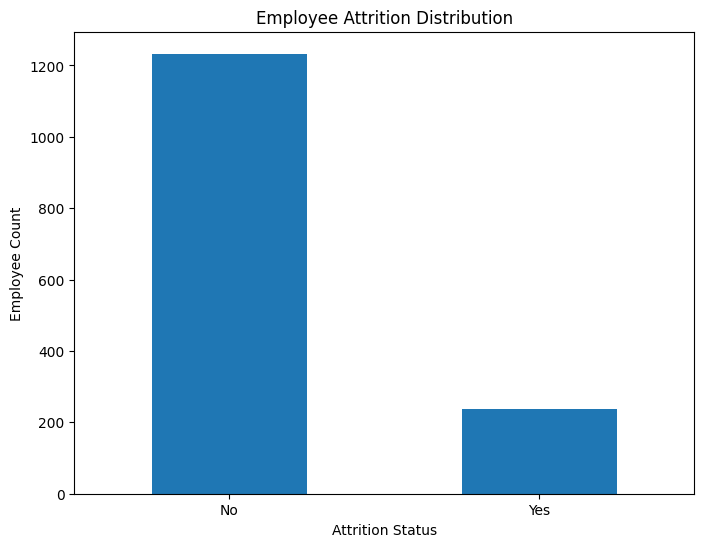

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

df['Attrition'].value_counts().plot(kind='bar')

plt.xlabel('Attrition Status')
plt.ylabel('Employee Count')
plt.title('Employee Attrition Distribution')

plt.xticks(rotation=0)
plt.show()

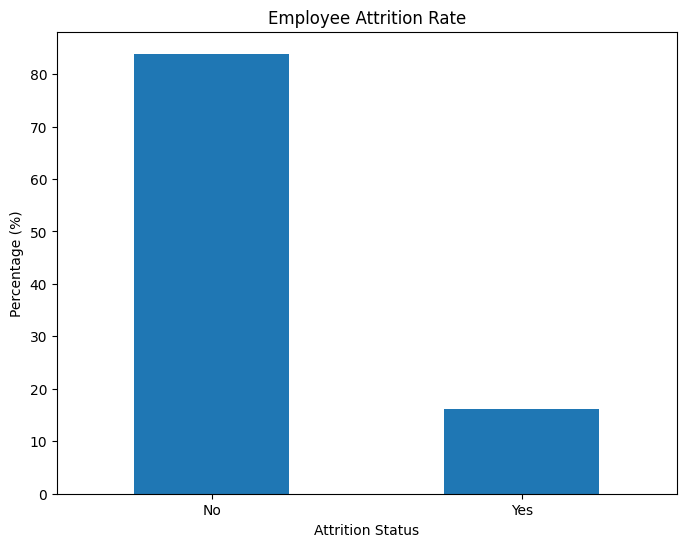

In [19]:
attrition_pct = df['Attrition'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
attrition_pct.plot(kind='bar')

plt.xlabel('Attrition Status')
plt.ylabel('Percentage (%)')
plt.title('Employee Attrition Rate')

plt.xticks(rotation=0)
plt.show()

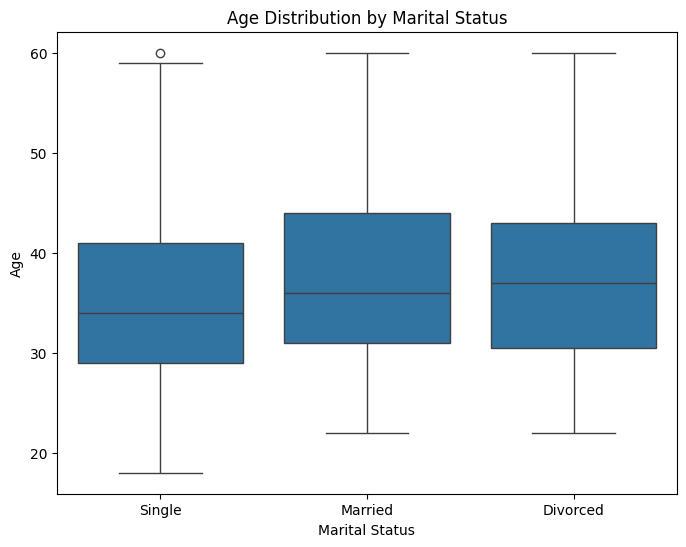

In [20]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=df,
    x='MaritalStatus',
    y='Age'
)

plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.title('Age Distribution by Marital Status')

plt.show()

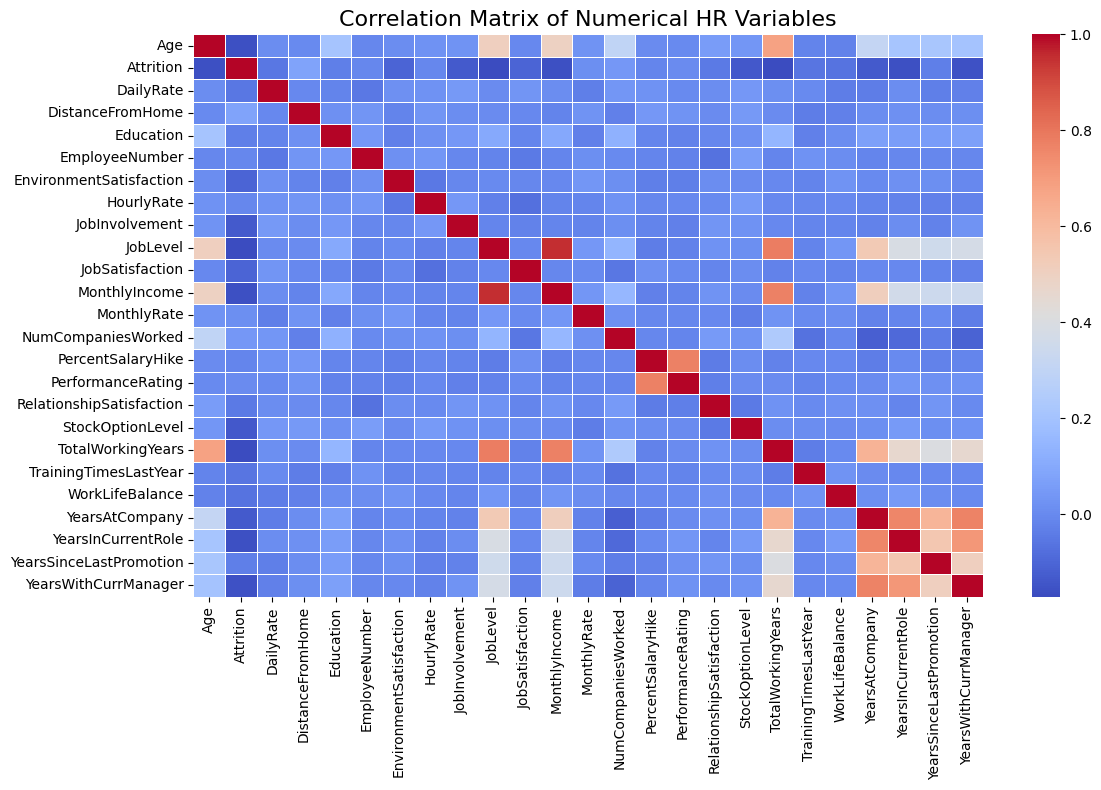

In [21]:
df2 = df.copy()

plt.figure(figsize=(12, 8))

# Encode Attrition (target variable)
df2['Attrition'] = LabelEncoder().fit_transform(df2['Attrition'])
# Yes = 1, No = 0

# Select only numeric columns
numeric_df = df2.select_dtypes(exclude='object')

# Drop constant columns (important for IBM dataset)
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]

# Correlation matrix
corr = numeric_df.corr()

# Heatmap
sns.heatmap(
    corr,
    cmap='coolwarm',
    cbar=True,
    linewidths=0.5
)

plt.title("Correlation Matrix of Numerical HR Variables", fontsize=16)
plt.tight_layout()
plt.show()

# prepare data for modeling

In [22]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Separate categorical and numerical columns

In [23]:
# Identify categorical and numerical columns in IBM HR dataset
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical Columns:\n", categorical_columns)
print("\nNumerical Columns:\n", numerical_columns)

Categorical Columns:
 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

Numerical Columns:
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [24]:
df[numerical_columns].head(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [25]:
df[categorical_columns].head(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [26]:
target_column = 'Attrition'

# Ensure target is excluded from predictors
predictor_numerical = [col for col in numerical_columns if col != target_column]
predictor_categorical = [col for col in categorical_columns if col != target_column]

print("Numerical predictors:\n", predictor_numerical)
print("\nCategorical predictors:\n", predictor_categorical)

Numerical predictors:
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Categorical predictors:
 ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


## convert categorical columns to numerical

Apply label encoding to categorical columns

In [27]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [28]:
from sklearn.preprocessing import LabelEncoder

# Copy the dataframe to avoid modifying the original
df_encoded = df.copy()

# Encode each categorical column separately
for column in categorical_columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])

# Optional: check result
df_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


Apply scaling to numerical columns

In [29]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,2,0.742527,2,-1.010909,-0.891688,1,0.0,-1.701283,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,1,-1.297775,1,-0.147150,-1.868426,1,0.0,-1.699621,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,2,1.414363,1,-0.887515,-0.891688,4,0.0,-1.696298,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,1,1.461466,1,-0.764121,1.061787,1,0.0,-1.694636,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,2,-0.524295,1,-0.887515,-1.868426,3,0.0,-1.691313,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


# Data spliting

Split features (data) and target variable

In [30]:
# Features (all columns except the target)
X = df.drop(columns=['Attrition'])

# Target variable
y = df['Attrition']

# Optional: check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Target distribution:\n", y.value_counts())

X shape: (1470, 34)
y shape: (1470,)
Target distribution:
 Attrition
0    1233
1     237
Name: count, dtype: int64


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print('train features shape: ',X_train.shape)
print('train target   shape: ',y_train.shape)
print('__________\n')
print('test  features shape: ',X_test.shape)
print('test  target   shape: ',y_test.shape)

train features shape:  (1176, 34)
train target   shape:  (1176,)
__________

test  features shape:  (294, 34)
test  target   shape:  (294,)


# Modeling

## LinearRegression

### training

In [33]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

### Evaluation

In [34]:
y_pred=LR.predict(X_test)
y_pred

array([ 0.17787977, -0.13973858,  0.21341271, -0.02774711,  0.07318453,
        0.23135441,  0.2932213 ,  0.01260007,  0.23240757, -0.07149222,
        0.36844246,  0.09515341,  0.27354956,  0.10451236,  0.10821253,
        0.13218613,  0.34127679,  0.13441958,  0.40646714,  0.11912007,
        0.31035777, -0.09505794,  0.10995429,  0.37414009,  0.26742407,
        0.0287025 ,  0.19196101, -0.00821301,  0.20324915,  0.16612745,
        0.04911647, -0.09627388, -0.15219107,  0.01403568,  0.45104444,
       -0.13665585, -0.07743952,  0.38163965,  0.4710098 ,  0.10052888,
        0.174663  ,  0.25200486,  0.17341311,  0.11765003,  0.44079804,
        0.04767634,  0.52231228,  0.41307625,  0.34619769,  0.60089559,
        0.08394447,  0.27896314,  0.01265359,  0.2157969 ,  0.18490475,
        0.19677135,  0.33779272, -0.21057106,  0.20523995,  0.1695249 ,
       -0.0119497 ,  0.37996742,  0.00511738, -0.12364493,  0.38974211,
        0.51604896,  0.05797133,  0.3253906 ,  0.02359802,  0.21

In [35]:
y_test

,Attrition
1041,0
184,0
1222,1
67,0
220,0
...,...
567,0
560,0
945,0
522,0


In [36]:
threshold = 0.5
y_pred = np.where(y_pred >= threshold, 1, 0)
print(classification_report(y_test,y_pred,target_names=['not deposit','deposit']))

              precision    recall  f1-score   support

 not deposit       0.89      1.00      0.94       255
     deposit       1.00      0.15      0.27        39

    accuracy                           0.89       294
   macro avg       0.94      0.58      0.60       294
weighted avg       0.90      0.89      0.85       294



In [37]:
LR.coef_

array([-3.24001261e-02, -5.16174142e-03, -7.89595202e-03,  4.91106706e-02,
        2.69651862e-02,  5.55021232e-03,  6.81698923e-03,  1.10328413e-15,
       -7.70404306e-04, -3.95772125e-02,  3.80461957e-02,  7.30703832e-04,
       -3.88776613e-02, -4.95413884e-02,  9.81833000e-04, -4.34530381e-02,
        7.11470556e-02,  8.91380768e-03,  6.63183788e-03,  4.89546243e-02,
       -7.63278329e-17,  2.34841086e-01, -1.24630845e-02,  5.22037374e-03,
       -1.52424650e-02, -2.81892565e-18, -1.84399385e-02, -2.32203919e-02,
       -9.97439598e-03, -1.93843384e-02,  5.36856480e-02, -5.32885258e-02,
        3.68262455e-02, -3.63656940e-02])

In [38]:
LR.intercept_

np.float64(-0.07496031459909422)

save the results

In [39]:
results = pd.DataFrame(columns=['Model Name','Accuracy','Precision Score','Recall Score','F1-Score','roc_auc'])

### Confusion matrix

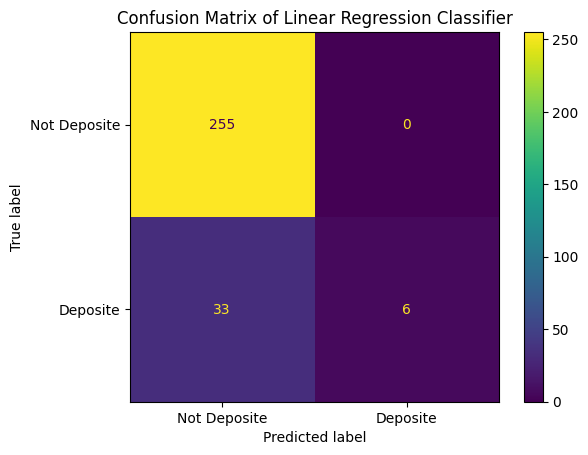

In [40]:
cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Deposite','Deposite'])
cm_display.plot()
plt.title("Confusion Matrix of Linear Regression Classifier")
plt.show()

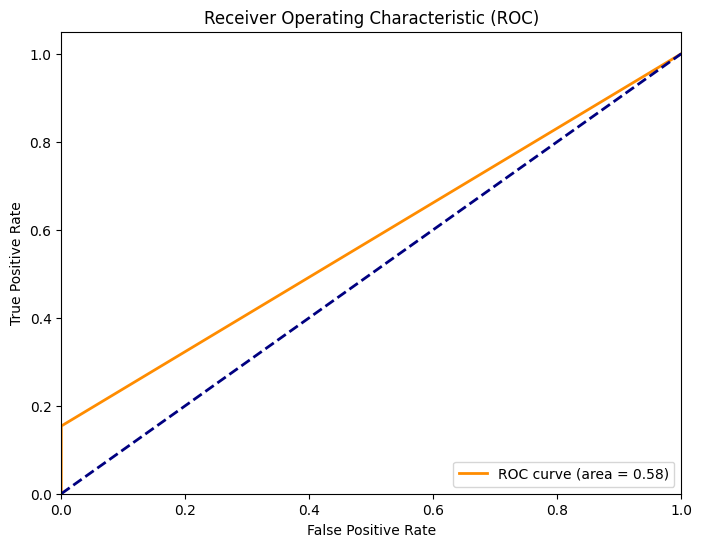

In [41]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [42]:
model_result = ['Linear Regression',accuracy_score(y_test,y_pred),
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc]
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.887755,1.0,0.153846,0.266667,0.576923


## Random forest classifier

### model training

In [43]:
RF=RandomForestClassifier(n_estimators=10,criterion='entropy')
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

### Evaluation

In [44]:
y_pred=RF.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
print(classification_report(y_test,y_pred,target_names=['not deposit','deposit']))

              precision    recall  f1-score   support

 not deposit       0.87      0.98      0.92       255
     deposit       0.33      0.05      0.09        39

    accuracy                           0.86       294
   macro avg       0.60      0.52      0.51       294
weighted avg       0.80      0.86      0.81       294



### the Confusion matrix

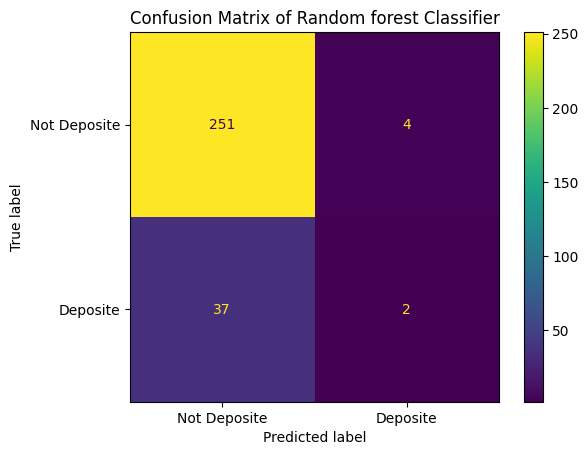

In [46]:

cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Deposite','Deposite'])
cm_display.plot()
plt.title("Confusion Matrix of Random forest Classifier")
plt.show()

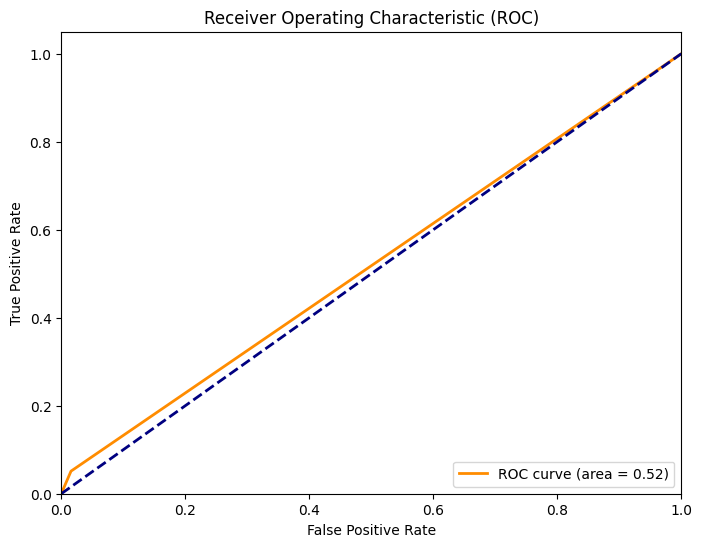

In [47]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### save reults

In [48]:
model_result = ['Random Forest',accuracy_score(y_test,y_pred),
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc]
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.887755,1.000000,0.153846,0.266667,0.576923
1,Random Forest,0.860544,0.333333,0.051282,0.088889,0.517798


## Logistic Regression

### model training

In [49]:
Logistic_regression = LogisticRegression(penalty='l2', dual=False, C=0.9, fit_intercept=True
                        , random_state = 41, max_iter=1000)
Logistic_regression.fit(X_train, y_train)

LogisticRegression(C=0.9, max_iter=1000, random_state=41)

### model evaluation

In [50]:
y_pred=Logistic_regression.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [51]:
print(classification_report(y_test,y_pred,target_names=['not deposit','deposit']))

              precision    recall  f1-score   support

 not deposit       0.91      0.98      0.94       255
     deposit       0.74      0.36      0.48        39

    accuracy                           0.90       294
   macro avg       0.82      0.67      0.71       294
weighted avg       0.89      0.90      0.88       294



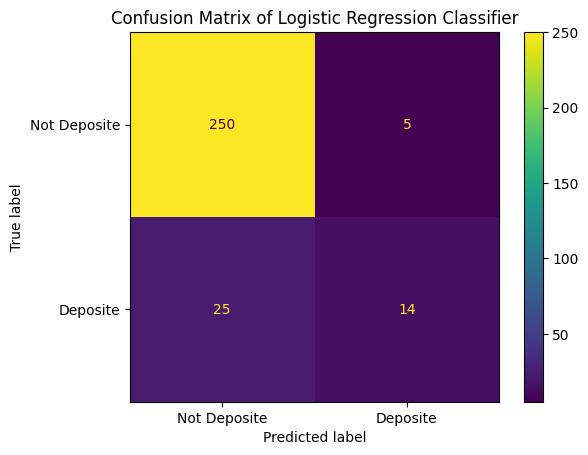

In [52]:

cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Deposite','Deposite'])
cm_display.plot()
plt.title("Confusion Matrix of Logistic Regression Classifier")
plt.show()

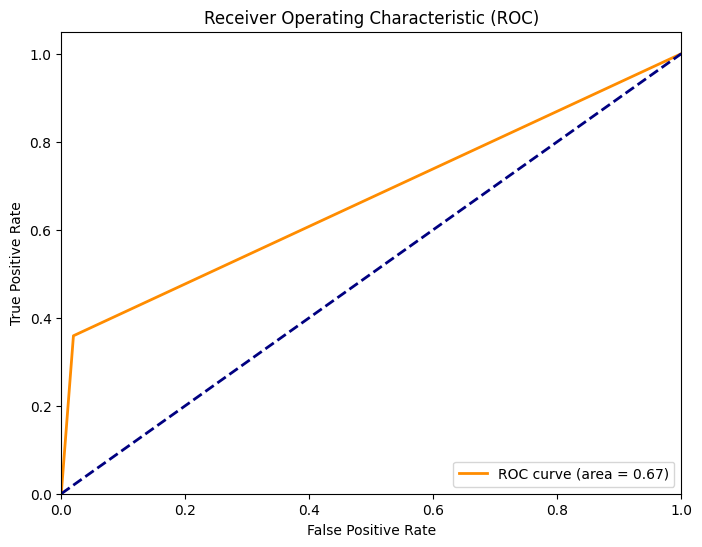

In [53]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

save results

In [54]:
model_result = ['Logistic Regression',accuracy_score(y_test,y_pred),
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc]
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.887755,1.000000,0.153846,0.266667,0.576923
1,Random Forest,0.860544,0.333333,0.051282,0.088889,0.517798
2,Logistic Regression,0.897959,0.736842,0.358974,0.482759,0.669683


## Linear Support-Vector Classifier

### mosel training

In [55]:
LSVC = LinearSVC(penalty='l2',dual=False, C=.9)
LSVC.fit(X_train,y_train)

LinearSVC(C=0.9, dual=False)

### Model Evaluation

In [56]:
y_pred=LSVC.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
print(classification_report(y_test,y_pred,target_names=['not deposit','deposit']))

              precision    recall  f1-score   support

 not deposit       0.89      0.99      0.94       255
     deposit       0.75      0.23      0.35        39

    accuracy                           0.89       294
   macro avg       0.82      0.61      0.65       294
weighted avg       0.87      0.89      0.86       294



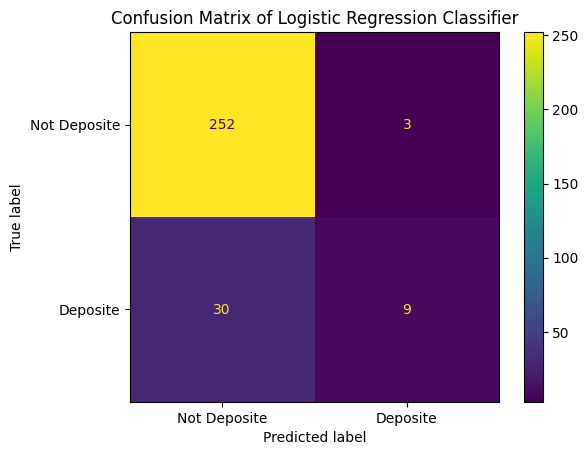

In [58]:

cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Deposite','Deposite'])
cm_display.plot()
plt.title("Confusion Matrix of Logistic Regression Classifier")
plt.show()

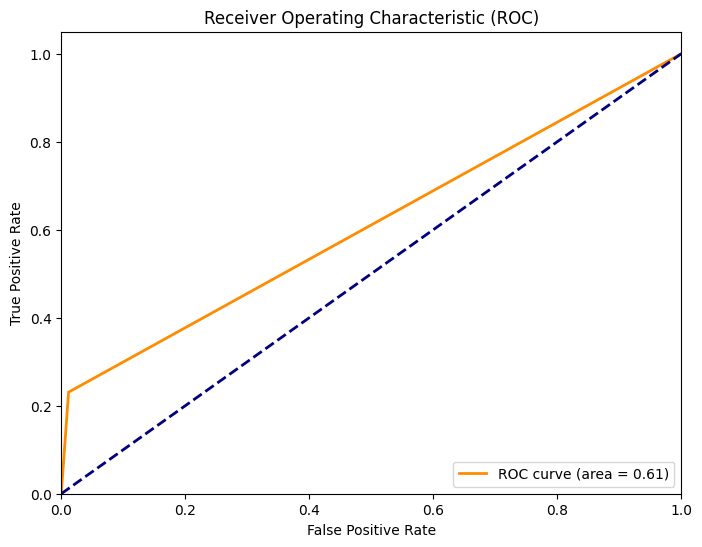

In [59]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [60]:
model_result = ['Linear SVC',accuracy_score(y_test,y_pred),
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc]
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.887755,1.000000,0.153846,0.266667,0.576923
1,Random Forest,0.860544,0.333333,0.051282,0.088889,0.517798
2,Logistic Regression,0.897959,0.736842,0.358974,0.482759,0.669683
3,Linear SVC,0.887755,0.750000,0.230769,0.352941,0.609502


## CNN

### convert data to images
cnn mainly work with images, so we convert our numerical data image shape

In [61]:
#Normalize Data
X_normalized = (df - df.min()) / (df.max() - df.min())

X_array = X_normalized.values

N_samples, N_features = X_array.shape
height = 1
width = N_features
channels = 1
X_reshaped = X_array.reshape(N_samples, height, width, channels)


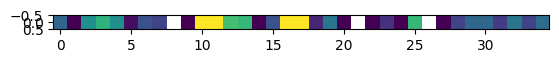

In [62]:
img=X_reshaped[5]
plt.imshow(img)
plt.show()

### split data


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [64]:
print('train features shape: ',X_train.shape)
print('train target   shape: ',y_train.shape)
print('__________\n')
print('valid  features shape: ',X_valid.shape)
print('valid  target   shape: ',y_valid.shape)
print('__________\n')
print('test  features shape: ',X_test.shape)
print('test  target   shape: ',y_test.shape)

train features shape:  (999, 1, 35, 1)
train target   shape:  (999,)
__________

valid  features shape:  (177, 1, 35, 1)
valid  target   shape:  (177,)
__________

test  features shape:  (294, 1, 35, 1)
test  target   shape:  (294,)


In [65]:
model = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(height, width, channels), padding='same'),
    MaxPooling2D((1, 2)),
    Flatten(),
    Dense(6, activation='relu'),
    Dropout(.1),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 1, 35, 2)       │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 1, 17, 2)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 34)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 237 (948.00 B)

 Trainable params: 237 (948.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
# Train Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.8333 - loss: nan - val_accuracy: 0.8192 - val_loss: nan
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8279 - loss: nan - val_accuracy: 0.8192 - val_loss: nan
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8404 - loss: nan - val_accuracy: 0.8192 - val_loss: nan
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8376 - loss: nan - val_accuracy: 0.8192 - val_loss: nan
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8437 - loss: nan - val_accuracy: 0.8192 - val_loss: nan
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8500 - loss: nan - val_accuracy: 0.8192 - val_loss: nan
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8416 - loss: nan - val_accuracy: 0.8192 - val_loss: nan
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8387 - loss: nan - val_accuracy: 0.8192 - val_loss: nan
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

### Evaluate Model

In [67]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8447 - loss: nan
Test Accuracy: 0.8673469424247742


In [68]:
y_pred=model.predict(X_test)
print(y_pred.shape)
y_pred[:5]

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
(294, 1)


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [69]:
# Assuming y_pred contains predicted probabilities from your model
threshold = 0.5

# Convert probabilities to binary predictions
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

# Print classification report
print(classification_report(
    y_test,
    y_pred_binary,
    target_names=['Stayed', 'Left']  # 0 = Stayed, 1 = Left
))

              precision    recall  f1-score   support

      Stayed       0.87      1.00      0.93       255
        Left       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



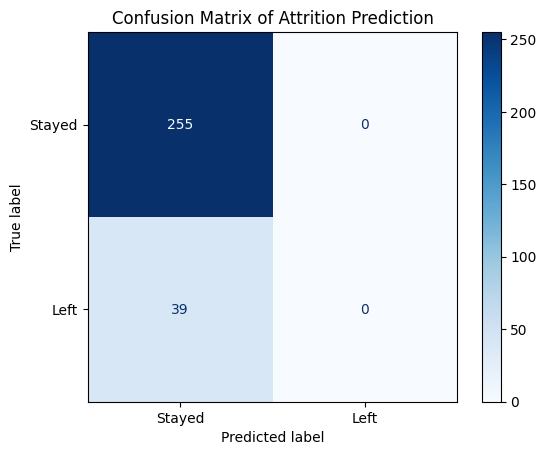

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm_matrix = confusion_matrix(y_test, y_pred_binary)

# Display confusion matrix with HR-friendly labels
cm_display = ConfusionMatrixDisplay(
    confusion_matrix=cm_matrix,
    display_labels=['Stayed', 'Left']  # 0 = Stayed, 1 = Left
)

# Plot
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix of Attrition Prediction")
plt.show()

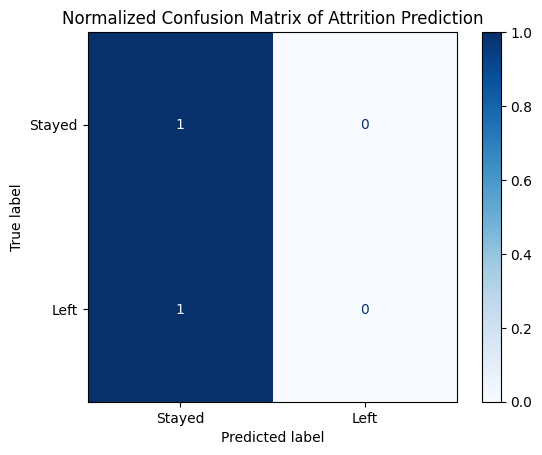

In [71]:
cm_display = ConfusionMatrixDisplay(
    confusion_matrix=cm_matrix / cm_matrix.sum(axis=1)[:, np.newaxis],
    display_labels=['Stayed', 'Left']
)
cm_display.plot(cmap='Blues')
plt.title("Normalized Confusion Matrix of Attrition Prediction")
plt.show()

##

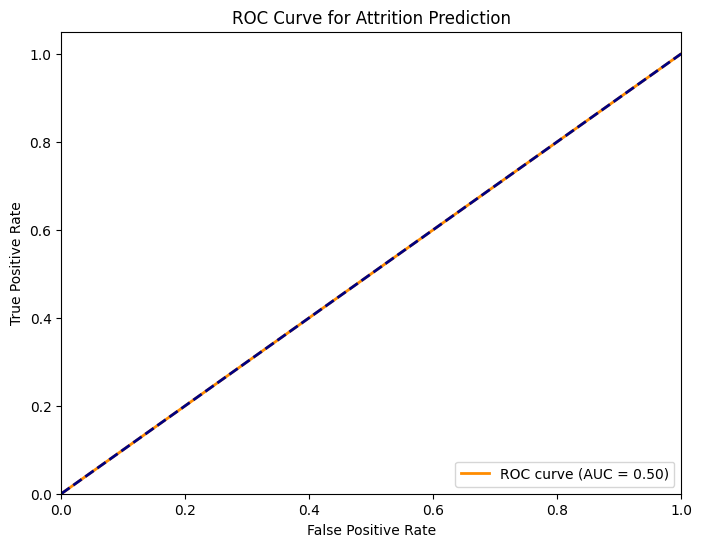

In [72]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_binary)  # use thresholded predictions
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Attrition Prediction')
plt.legend(loc="lower right")
plt.show()

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Example: y_pred_binary is your thresholded prediction, y_test is true labels
roc_auc_val = roc_auc_score(y_test, y_pred_binary)

# Collect model metrics
model_result = [
    'Logistic Regression',           # Update model name as needed
    accuracy_score(y_test, y_pred_binary),
    precision_score(y_test, y_pred_binary),
    recall_score(y_test, y_pred_binary),
    f1_score(y_test, y_pred_binary),
    roc_auc_val
]

# Remove previous results for this model (if exists)
results = results.drop(results[results['Model Name'] == 'Logistic Regression'].index, errors='ignore')

# Append new results
results.loc[len(results)] = model_result

# Display updated results table
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.887755,1.000000,0.153846,0.266667,0.576923
1,Random Forest,0.860544,0.333333,0.051282,0.088889,0.517798
3,Logistic Regression,0.867347,0.000000,0.000000,0.000000,0.500000


In [74]:
model.save('cnn_model.keras')

# Evaluation and comaprison

In [78]:
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.887755,1.000000,0.153846,0.266667,0.576923
1,Random Forest,0.860544,0.333333,0.051282,0.088889,0.517798
3,Logistic Regression,0.867347,0.000000,0.000000,0.000000,0.500000


### Accuracy Comparison

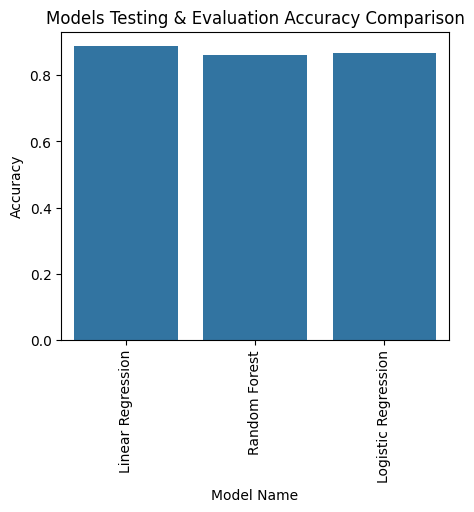

In [79]:
import seaborn as sns
plt.subplots(figsize=(5,4))
sns.barplot(x="Model Name", y="Accuracy",data=results)
plt.xticks(rotation=90)
plt.title('Models Testing & Evaluation Accuracy Comparison')
plt.show()

In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import load_model

# Load trained CNN
loaded_model = load_model('cnn_model.keras')

# Load new data
new_data_df = pd.read_csv('HR_Attrition_Copy.csv')

# Columns used during training (EXACT ORDER)
training_columns = [
    'Age','BusinessTravel','DailyRate','Department','DistanceFromHome','Education',
    'EducationField','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','Gender',
    'HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus',
    'MonthlyIncome','MonthlyRate','NumCompaniesWorked','Over18','OverTime',
    'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours',
    'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',
    'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'
]

# Keep only training columns
new_data_df = new_data_df[training_columns]

# Define categorical & numerical columns
categorical_columns = [
    'BusinessTravel','Department','EducationField','Gender',
    'JobRole','MaritalStatus','Over18','OverTime'
]

numerical_columns = [c for c in training_columns if c not in categorical_columns]

# --- Encode categorical columns (SAFE) ---
encoders = {}  # ✅ THIS WAS MISSING
for col in categorical_columns:
    le = LabelEncoder()
    new_data_df[col] = le.fit_transform(new_data_df[col])
    encoders[col] = le

# --- Scale numerical columns ---
scaler = StandardScaler()
new_data_df[numerical_columns] = scaler.fit_transform(new_data_df[numerical_columns])

# --- Reshape for CNN ---
X_new = new_data_df.values
X_new = X_new.reshape(X_new.shape[0], 1, X_new.shape[1], 1)

# --- Predict ---
predictions = loaded_model.predict(X_new)

# Binary output
y_pred = (predictions >= 0.5).astype(int)

print("Predicted Attrition (0 = Stayed, 1 = Left):")
print(y_pred.flatten())

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Attrition (0 = Stayed, 1 = Left):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
